# Introducción a modelos de regresión

## Primera parte: Analizar los datos

### Importamos las librerías necesarias

In [1]:
import numpy as np # algebra lineal
import pandas as pd # procesamiento de datos
import matplotlib.pyplot as plt # generación de gráficos

### Importamos nuestro conjunto de datos

In [3]:
precios_casas = pd.read_csv('house_data.csv')
precios_casas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Analizamos los datos y metadatos de nuestro data frame

In [4]:
precios_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Limpiamos los valores nulos

In [6]:
precios_casas = precios_casas.fillna(method='ffill')

## Segunda parte: Modelo de regresión lineal simple

### Extraemos nuestras variables a usar

In [7]:
datos = precios_casas['sqft_living']
precio = precios_casas['price']

In [8]:
x = np.array(datos).reshape(-1, 1)
y = np.array(precio)

### Debemos separar nuestros datos para entrenamiento y pruebas

In [11]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest =  train_test_split (x, y, test_size=1/3, random_state=0)

### Generamos nuestro modelo de regresión lineal

In [32]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Validamos nuestro modelo con la base de pruebas

In [14]:
pred = regressor.predict(xtest)

In [15]:
pred

array([ 362496.90888925, 1249614.79894487,  365234.92706844, ...,
        482969.70877335,  288570.41805129,  255714.19990108])

### Graficamos nuestro modelo

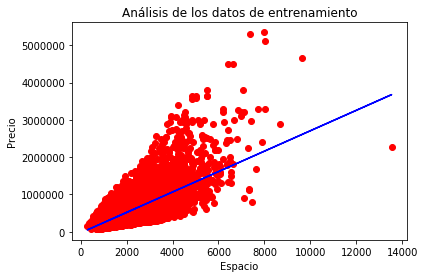

In [16]:
#Visualizamos nuestra base de entrenamiento
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Análisis de los datos de entrenamiento")
plt.xlabel("Espacio")
plt.ylabel("Precio")
plt.show()

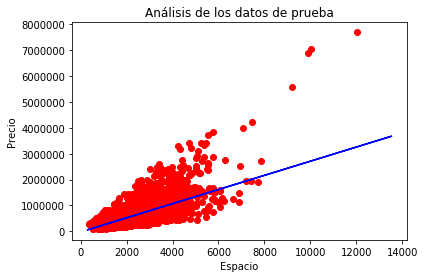

In [17]:
#Visualizamos nuestra base de pruebas
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Análisis de los datos de prueba")
plt.xlabel("Espacio")
plt.ylabel("Precio")
plt.show()

### Verificamos el coeficiente de determinación (R2) de nuestro modelo

In [18]:
coeficiente = regressor.score(xtest, ytest)

In [19]:
print("Coeficiente: {}%".format(int(round(coeficiente * 100))))

Coeficiente: 50%


## Segundo modelo: Regresión Lineal múltiple

### Revisamos todos los campos y verificamos cuales sí deberían aplicar a nuestro modelo

In [20]:
all_params = list(precios_casas)

In [23]:
x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront','condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15','yr_renovated']
print(list(set(all_params) - set(x_vars)))

['id', 'zipcode', 'date', 'lat', 'long', 'price', 'view']


### Descartamos las variables que no serán utilizadas y asignamos nuestra variable objetivo

In [26]:
y = precios_casas.iloc[:, 2].values
precios_casas = precios_casas.drop(['date','price','lat', 'zipcode', 'view', 'id', 'long'], axis=1)
X = precios_casas.iloc[:, ].values

### Separamos en datos de entrenamiento y testing

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Aplicamos un Scaler para que nuestra regresión lineal soporte más de una variable

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [37]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Verificamos el coeficiente de determinación (R2) de nuestro modelo

In [38]:
coeficiente = regressor1.score(X_test, y_test)
print("Coeficiente: {}%".format(int(round(coeficiente * 100))))

Coeficiente: 64%
